***Feature extract***

import some library and load the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('model_df.csv')

In [4]:
df.head()

,bookingID,second,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,1.202591e+12,1362.0,3.0,353.0,0.000000,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966
1,1.073742e+12,902.0,3.9,126.0,7.913285,3.871542,10.386364,-0.136474,0.001344,-0.339601,-0.017956
2,1.056562e+12,820.0,3.9,50.0,20.419409,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530
3,1.185411e+12,533.0,3.9,178.0,19.250000,0.805649,9.206902,2.954445,-0.057104,-0.043555,0.002334
4,8.847633e+11,200.0,3.0,48.0,0.000000,0.109022,10.043245,-0.196497,-0.000698,-0.001902,0.015586


In [5]:
df.describe()

,bookingID,second,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,9.869876e+06,9.869876e+06,9.869876e+06,9.869876e+06,9.869876e+06,9.869876e+06,9.869876e+06,9.869876e+06,9.869876e+06,9.869876e+06,9.869876e+06
mean,8.207874e+11,5.993891e+02,4.095420e+00,1.679335e+02,8.985428e+00,1.090258e-01,8.517005e+00,1.595264e+00,-1.687968e-04,-1.810472e-03,-1.848190e-04
std,4.939730e+11,4.612251e+02,9.970412e-01,1.079786e+02,8.160272e+00,1.361022e+00,3.905624e+00,2.785688e+00,1.278135e-01,3.698919e-01,1.270341e-01
min,1.000000e+00,0.000000e+00,7.500000e-01,0.000000e+00,0.000000e+00,-7.841969e+01,-5.780019e+01,-7.844842e+01,-3.347175e+01,-7.488861e+01,-3.651154e+01
25%,3.865471e+11,2.430000e+02,3.464000e+00,7.695140e+01,3.465148e-01,-4.590000e-01,8.782471e+00,-2.059076e-01,-2.304428e-02,-2.767944e-02,-1.761200e-02
50%,8.074539e+11,5.210000e+02,3.900000e+00,1.670000e+02,7.670000e+00,1.053481e-01,9.452597e+00,1.324591e+00,0.000000e+00,0.000000e+00,-1.745329e-05
75%,1.254130e+12,8.580000e+02,4.000000e+00,2.620000e+02,1.555993e+01,6.707611e-01,9.824936e+00,3.202245e+00,2.253723e-02,2.737348e-02,1.704423e-02
max,1.709397e+12,8.235000e+03,7.799000e+00,3.599986e+02,3.912000e+01,4.770832e+01,7.281000e+01,7.766549e+01,3.983975e+01,6.419057e+01,6.630078e+01


In [6]:
#Sort the data
df.sort_values(['bookingID','second'],inplace=True)

In [7]:
#Calculate the degree of the phone

df['roll'] = np.arctan2(df['acceleration_y'],df['acceleration_z']) * 180/np.pi
df['pitch'] = np.arctan(-df['acceleration_x']/np.sqrt((df['acceleration_y']**2)+(df['acceleration_z']**2))) * 180/ np.pi
df['compAngleX'] = 0.98 * (df['roll'] + df['gyro_x']) + 0.02 * df['roll']
df['compAngleY'] = 0.98 * (df['pitch'] + df['gyro_x']) + 0.02 * df['pitch']

*Calculate feature*

In [8]:
df['Bearing_diff']=df['Bearing'].diff()
df.loc[df['second']==0,['Bearing_diff']]= 0

In [9]:
df['Speed_diff']=df['Speed'].diff()
df.loc[df['second']==0,['Speed_diff']]= 0

In [10]:
df['distance'] = df['Speed'] * df['second'].diff()

In [11]:
df['distance'][df['second'] == 0] = 0

In [12]:
df.head()

,bookingID,second,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,roll,pitch,compAngleX,compAngleY,Bearing_diff,Speed_diff,distance
130076,1.0,0.0,4.0,252.0,4.756427,-1.394632,10.174141,-2.503770,0.016127,0.212284,-0.039776,103.825285,7.581784,103.841089,7.597588,0.0,0.000000,0.000000
8851682,1.0,1.0,4.0,236.0,4.937211,-0.840489,8.749026,-3.274607,0.037472,0.134862,-0.011083,110.519995,5.141127,110.556717,5.177849,-16.0,0.180784,4.937211
8591444,1.0,2.0,4.0,228.0,5.544210,-1.944456,8.989030,-2.978358,-0.024487,0.102224,-0.014870,108.331715,11.603637,108.307717,11.579640,-8.0,0.606999,5.544210
5493010,1.0,3.0,4.0,222.0,6.564030,-0.820675,9.282243,-2.126961,0.007522,0.089431,0.006004,102.906120,4.925572,102.913492,4.932944,-6.0,1.019819,6.564030
2051570,1.0,4.0,4.0,216.0,7.358976,-1.020284,9.382215,-2.618797,-0.019007,0.002409,-0.014382,105.595667,5.979522,105.577040,5.960896,-6.0,0.794946,7.358976


In [13]:
#Visualize a random trip:
trip1  = df[df['bookingID'] == 1]

In [14]:
trip1.head()

,bookingID,second,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,roll,pitch,compAngleX,compAngleY,Bearing_diff,Speed_diff,distance
130076,1.0,0.0,4.0,252.0,4.756427,-1.394632,10.174141,-2.503770,0.016127,0.212284,-0.039776,103.825285,7.581784,103.841089,7.597588,0.0,0.000000,0.000000
8851682,1.0,1.0,4.0,236.0,4.937211,-0.840489,8.749026,-3.274607,0.037472,0.134862,-0.011083,110.519995,5.141127,110.556717,5.177849,-16.0,0.180784,4.937211
8591444,1.0,2.0,4.0,228.0,5.544210,-1.944456,8.989030,-2.978358,-0.024487,0.102224,-0.014870,108.331715,11.603637,108.307717,11.579640,-8.0,0.606999,5.544210
5493010,1.0,3.0,4.0,222.0,6.564030,-0.820675,9.282243,-2.126961,0.007522,0.089431,0.006004,102.906120,4.925572,102.913492,4.932944,-6.0,1.019819,6.564030
2051570,1.0,4.0,4.0,216.0,7.358976,-1.020284,9.382215,-2.618797,-0.019007,0.002409,-0.014382,105.595667,5.979522,105.577040,5.960896,-6.0,0.794946,7.358976


In [15]:
trip1.sort_values('second',inplace=True)

C:\Users\minhcq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


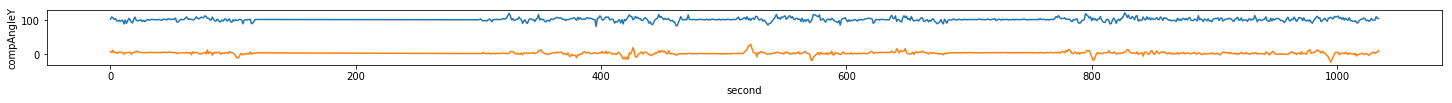

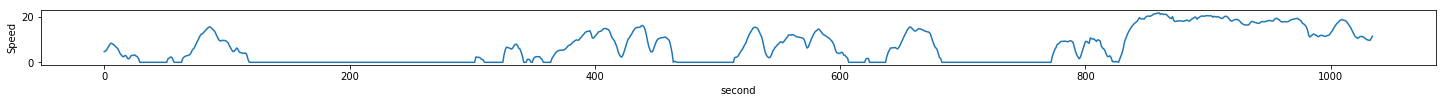

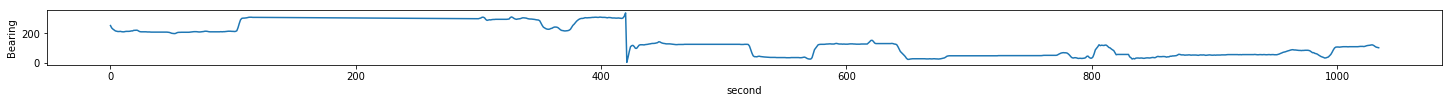

In [16]:
plt.figure(figsize=(25,1))
sns.lineplot(data=trip1,x='second',y='compAngleX')
sns.lineplot(data=trip1,x='second',y='compAngleY')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip1,x='second',y='Speed')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip1,x='second',y='Bearing')

In [17]:
trip2 = df[df['bookingID'] == 1073741824054] 

In [18]:
trip2.head()

,bookingID,second,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,roll,pitch,compAngleX,compAngleY,Bearing_diff,Speed_diff,distance
9490346,1.073742e+12,0.0,3.900,96.0,5.685404,3.050306,9.909904,0.981653,-0.127549,0.074565,0.043741,84.342865,-17.030071,84.217867,-17.155068,0.0,0.000000,0.000000
5136759,1.073742e+12,1.0,3.900,95.0,4.534975,0.660820,9.775824,2.449343,0.028222,0.022031,-0.043002,75.934043,-3.751545,75.961701,-3.723888,-1.0,-1.150429,4.534975
7719700,1.073742e+12,2.0,3.634,95.0,3.283000,0.837996,9.622590,1.592193,-0.016371,-0.077540,0.052293,80.604733,-4.910687,80.588689,-4.926731,0.0,-1.251976,3.283000
5137929,1.073742e+12,3.0,3.351,95.0,2.071853,0.895459,9.909904,1.005595,0.007453,0.005537,-0.011848,84.205814,-5.136986,84.213117,-5.129683,0.0,-1.211147,2.071853
5611668,1.073742e+12,4.0,3.000,95.0,0.000000,0.706311,9.735122,0.538712,-0.001710,0.003094,0.000370,86.832657,-4.143385,86.830981,-4.145062,0.0,-2.071853,0.000000


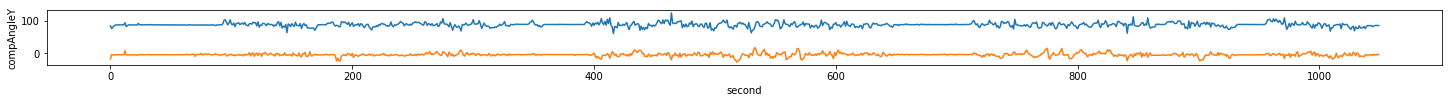

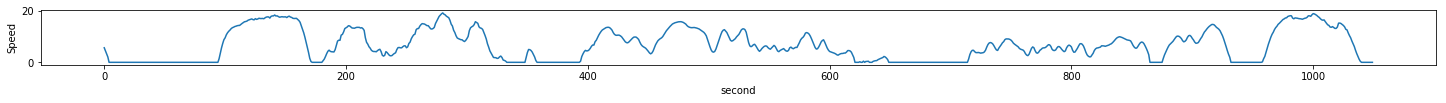

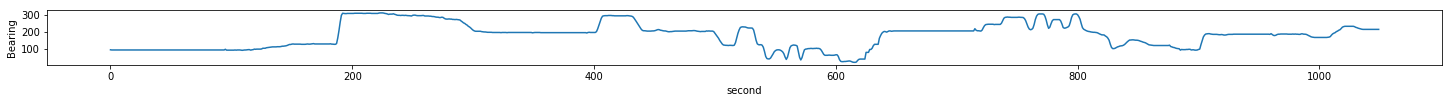

In [19]:
plt.figure(figsize=(25,1))
sns.lineplot(data=trip2,x='second',y='compAngleX')
sns.lineplot(data=trip2,x='second',y='compAngleY')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip2,x='second',y='Speed')
plt.figure(figsize=(25,1))
sns.lineplot(data=trip2,x='second',y='Bearing')

In [157]:
df['bookingID'].unique()

array([1.00000000e+00, 2.00000000e+00, 6.00000000e+00, ...,
       1.70939698e+12, 1.70939698e+12, 1.70939698e+12])

Group the data by trip:

In [161]:
def quantile_25(x):
    return x.quantile(0.25)
def quantile_5(x):
    return x.quantile(0.5)
def quantile_75(x):
    return x.quantile(0.75)
def quantile_8(x):
    return x.quantile(0.8)
def quantile_9(x):
    return x.quantile(0.9)
def triptime(x):
    return x.max()

In [162]:
model_df_1 = df.pivot_table(index='bookingID',values = ['distance'], aggfunc=sum)
model_df_2 = df.pivot_table(index='bookingID',values = ['second'], aggfunc=max)

In [163]:
model_df_3 = df.pivot_table(index='bookingID',values=['Speed','Bearing','compAngleX','compAngleY','Bearing_diff','Speed_diff'],aggfunc=[quantile_25,quantile_5,quantile_75,quantile_8,quantile_9])

In [164]:
model_df_4 = df.pivot_table(index='bookingID',values=['Speed','Bearing','compAngleX','compAngleY','Bearing_diff','Speed_diff'],aggfunc=[np.mean,np.std,np.min,np.max])

In [165]:
model_df = model_df_1.join([model_df_2,model_df_3,model_df_4])

In [166]:
model_df.head()

,distance,second,"(quantile_25, Bearing)","(quantile_25, Bearing_diff)","(quantile_25, Speed)","(quantile_25, Speed_diff)","(quantile_25, compAngleX)","(quantile_25, compAngleY)","(quantile_5, Bearing)","(quantile_5, Bearing_diff)",...,"(amin, Speed)","(amin, Speed_diff)","(amin, compAngleX)","(amin, compAngleY)","(amax, Bearing)","(amax, Bearing_diff)","(amax, Speed)","(amax, Speed_diff)","(amax, compAngleX)","(amax, compAngleY)"
bookingID,,,,,,,,,,,,,,,,,,,,,
1.0,6844.871210,1034.0,50.0,-1.0,0.000000,-0.227863,100.847996,1.365338,110.0,0.0,...,0.0,-4.099883,82.203521,-24.178214,337.0,39.0,21.882141,4.188556,122.460492,29.361171
2.0,609.642773,825.0,22.0,-1.0,0.000000,-0.441118,85.355433,-4.823434,232.0,0.0,...,0.0,-4.439833,76.101715,-11.624707,354.0,148.0,9.360483,3.292830,108.354759,14.904756
6.0,5019.041960,1094.0,81.0,0.0,0.000000,-0.118952,73.716546,-4.448471,248.0,0.0,...,0.0,-5.832877,51.754340,-33.069233,359.0,353.0,16.394695,3.398443,106.651319,26.094357
7.0,11656.021118,959.0,46.0,-1.0,3.545921,-0.214639,74.006377,-10.769021,57.0,0.0,...,0.0,-2.928770,47.874165,-25.232821,359.0,358.0,25.230654,4.060644,106.404392,21.530432
8.0,2549.650000,462.0,0.0,0.0,0.000000,-0.160000,77.644521,5.768553,201.0,0.0,...,0.0,-10.920000,60.300638,-5.019443,348.0,309.0,17.830000,3.100000,105.625946,22.587755


Save the grouped data

In [167]:
model_df.to_csv('feature_extracted.csv')